<a href="https://colab.research.google.com/github/SZPiho/Classification-with-ANN-using-fashion-MNIST-dataset/blob/main/Classification_with_ANN_using_fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mnist=keras.datasets.fashion_mnist

In [ ]:
type(mnist)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.max(x_train)

255

In [ ]:
np.mean(x_train)

72.94035223214286

In [ ]:
class_names=["top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

In [ ]:
###data exploration

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

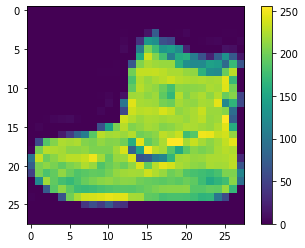

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

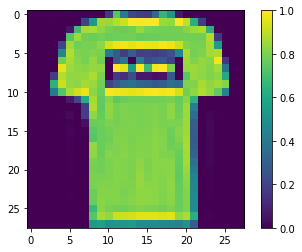

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

building a model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28 ,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4981 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3133 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2974 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2844 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2719 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2602 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2513 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.241

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8819
0.8819000124931335


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
y_pred
accuracy_score(y_test,y_pred)

0.8819

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred

array([[1.2688353e-07, 7.3544990e-12, 2.4449431e-10, ..., 4.4509699e-03,
        6.9497634e-09, 9.9488527e-01],
       [3.7568182e-06, 4.4662645e-14, 9.9448818e-01, ..., 2.7963112e-16,
        1.5037982e-07, 7.4787509e-16],
       [1.2826739e-08, 1.0000000e+00, 3.7126721e-12, ..., 1.2998158e-22,
        2.7381758e-11, 4.1817537e-19],
       ...,
       [3.7754377e-05, 7.9047247e-10, 5.9085669e-06, ..., 1.5753874e-11,
        9.9936980e-01, 4.5599016e-14],
       [2.0901049e-07, 9.9990940e-01, 3.0468064e-09, ..., 4.3372512e-14,
        2.9655942e-07, 6.2498257e-10],
       [8.8285808e-05, 6.7426651e-09, 1.1579342e-05, ..., 6.8466371e-04,
        3.1042690e-04, 1.2024842e-05]], dtype=float32)

In [ ]:
pred[0]

array([1.2688353e-07, 7.3544990e-12, 2.4449431e-10, 2.8272809e-11,
       1.0786380e-09, 6.6360284e-04, 1.1818022e-08, 4.4509699e-03,
       6.9497634e-09, 9.9488527e-01], dtype=float32)